___
# Ciência dos Dados - PROJETO 1

## Gabriel Pizzighini Salvador
___

## A comunicação na região do Parána 

___
## Introdução

o objetivo desta pesquisa é fazer uma comparaçao em que quanto o uso da internet influencia na renda da população do Parána, levando-se em base os dados do IBGE das PNADs dos anos 2013, 2014 e 2015.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
#dt = pd.DataFrame


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Faculdade\Documents\2º Semestre\Ciência dos Dados\GitHub\CD-Projeto-1\Dados


Incerção das tabelas para os anos de 2015, 2014 e 2013 respectivamente:

In [3]:
#Indices de 2015 com limpeza de dados 
data = pd.read_csv('DOM2015.csv',sep=',')
data_resume_2015 = data.loc[:,['UF','V02270','V02271','V02322','V4614','V4621','V4622']]
data_resume_2015 = pd.DataFrame(data_resume_2015[data_resume_2015["UF"].isin(["41"])])
data_resume_2015['Num.Televisores'] = data_resume_2015['V02270'] + data_resume_2015['V02271']
del data_resume_2015['V02270']
del data_resume_2015['V02271']
data_resume_2015 = data_resume_2015.rename(columns = {'V02322' : 'Internet','V4614':'Rend.mens.Domiciliar','V4621':'Ren.mens.percapta','V4622':'Faixa.Rend.mens.percapta'})
data_resume_2015['Internet'] = data_resume_2015['Internet'].astype('category')
data_resume_2015['UF'] = data_resume_2015['UF'].astype('category')
data_resume_2015['Rend.mens.Domiciliar'] =data_resume_2015['Rend.mens.Domiciliar'].astype('float')
data_resume_2015['Ren.mens.percapta'] = data_resume_2015['Ren.mens.percapta'].astype('float')
data_resume_2015.Internet.cat.categories = (['Sim', 'Nao'])
data_resume_2015.UF.cat.categories = (['PR'])
data_resume_2015 = data_resume_2015[data_resume_2015['Rend.mens.Domiciliar']!=999999999999.0]
data_resume_2015 = data_resume_2015[pd.notnull(data_resume_2015['Internet'])&pd.notnull(data_resume_2015['Rend.mens.Domiciliar'])&pd.notnull(data_resume_2015['Ren.mens.percapta'])&pd.notnull(data_resume_2015['Num.Televisores'])]
pd.DataFrame(data_resume_2015)


,UF,Internet,Rend.mens.Domiciliar,Ren.mens.percapta,Faixa.Rend.mens.percapta,Num.Televisores
110422,PR,Sim,900.0,180.0,1.0,1.0
110423,PR,Nao,2620.0,1310.0,4.0,2.0
110424,PR,Sim,1588.0,794.0,4.0,2.0
110425,PR,Nao,3076.0,1025.0,4.0,1.0
110426,PR,Sim,1708.0,569.0,3.0,2.0
110427,PR,Sim,3100.0,775.0,3.0,2.0
110428,PR,Sim,1000.0,500.0,3.0,1.0
110429,PR,Sim,3538.0,707.0,3.0,2.0
110430,PR,Nao,1738.0,579.0,3.0,1.0
110431,PR,Sim,3200.0,640.0,3.0,1.0


In [4]:
#Indices de 2014 com limpeza de Dados 
data = pd.read_csv('DOM2014.csv',sep=',')
data_resume_2014 = data.loc[:,['UF','V02270','V02271','V02322','V4614','V4621','V4622']]
data_resume_2014 = pd.DataFrame(data_resume_2014[data_resume_2014["UF"].isin(["41"])])
data_resume_2014['Num.Televisores'] = data_resume_2014['V02270'] + data_resume_2014['V02271']
del data_resume_2014['V02270']
del data_resume_2014['V02271']
data_resume_2014 = data_resume_2014.rename(columns = {'V02322' : 'Internet','V4614':'Rend.mens.Domiciliar','V4621':'Ren.mens.percapta','V4622':'Faixa.Rend.mens.percapta'})
data_resume_2014['Internet'] = data_resume_2014['Internet'].astype('category')
data_resume_2014['UF'] = data_resume_2014['UF'].astype('category')
data_resume_2014['Rend.mens.Domiciliar'] =data_resume_2014['Rend.mens.Domiciliar'].astype('float')
data_resume_2014['Ren.mens.percapta'] = data_resume_2014['Ren.mens.percapta'].astype('float')
data_resume_2014.Internet.cat.categories = (['Sim', 'Nao'])
data_resume_2014.UF.cat.categories = (['PR'])
data_resume_2014 = data_resume_2014[data_resume_2014['Rend.mens.Domiciliar']!=999999999999.0]
data_resume_2014 = data_resume_2014[pd.notnull(data_resume_2014['Internet'])&pd.notnull(data_resume_2014['Rend.mens.Domiciliar'])&pd.notnull(data_resume_2014['Ren.mens.percapta'])&pd.notnull(data_resume_2014['Num.Televisores'])]
pd.DataFrame(data_resume_2014)


,UF,Internet,Rend.mens.Domiciliar,Ren.mens.percapta,Faixa.Rend.mens.percapta,Num.Televisores
110540,PR,Nao,1300.0,650.0,3.0,1.0
110541,PR,Sim,1300.0,433.0,3.0,2.0
110542,PR,Sim,2224.0,370.0,3.0,3.0
110543,PR,Nao,3000.0,3000.0,6.0,1.0
110544,PR,Nao,1626.0,406.0,3.0,1.0
110545,PR,Nao,1450.0,725.0,4.0,1.0
110546,PR,Nao,3400.0,1133.0,4.0,1.0
110547,PR,Nao,2500.0,1250.0,4.0,1.0
110548,PR,Nao,1000.0,333.0,2.0,1.0
110549,PR,Nao,1300.0,1300.0,4.0,1.0


In [5]:
#Indices de 2013 com limpeza de Dados 
data = pd.read_csv('DOM2013.csv',sep=',')
data_resume_2013 = data.loc[:,['UF','V02270','V02271','V02322','V4614','V4621','V4622']]
data_resume_2013 = pd.DataFrame(data_resume_2013[data_resume_2013["UF"].isin(["41"])])
data_resume_2013['Num.Televisores'] = data_resume_2013['V02270'] + data_resume_2013['V02271']
del data_resume_2013['V02270']
del data_resume_2013['V02271']
data_resume_2013 = data_resume_2013.rename(columns = {'V02322' : 'Internet','V4614':'Rend.mens.Domiciliar','V4621':'Ren.mens.percapta','V4622':'Faixa.Rend.mens.percapta'})
data_resume_2013['Internet'] = data_resume_2013['Internet'].astype('category')
data_resume_2013['UF'] = data_resume_2013['UF'].astype('category')
data_resume_2013['Rend.mens.Domiciliar'] =data_resume_2013['Rend.mens.Domiciliar'].astype('float')
data_resume_2013['Ren.mens.percapta'] = data_resume_2013['Ren.mens.percapta'].astype('float')
data_resume_2013.Internet.cat.categories = (['Sim', 'Nao'])
data_resume_2013.UF.cat.categories = (['PR'])
data_resume_2013 = data_resume_2013[data_resume_2013['Rend.mens.Domiciliar']!=999999999999.0]
data_resume_2013 = data_resume_2013[pd.notnull(data_resume_2013['Internet'])&pd.notnull(data_resume_2013['Rend.mens.Domiciliar'])&pd.notnull(data_resume_2013['Ren.mens.percapta'])&pd.notnull(data_resume_2013['Num.Televisores'])]
pd.DataFrame(data_resume_2013)

,UF,Internet,Rend.mens.Domiciliar,Ren.mens.percapta,Faixa.Rend.mens.percapta,Num.Televisores
108606,PR,Sim,3300.0,1650.0,5.0,1.0
108607,PR,Nao,2800.0,400.0,3.0,3.0
108608,PR,Nao,2500.0,833.0,4.0,2.0
108609,PR,Nao,2780.0,347.0,3.0,2.0
108610,PR,Nao,678.0,678.0,3.0,1.0
108612,PR,Sim,2357.0,589.0,3.0,2.0
108613,PR,Sim,2356.0,471.0,3.0,2.0
108614,PR,Sim,3900.0,1950.0,5.0,2.0
108615,PR,Nao,4205.0,525.0,3.0,1.0
108616,PR,Sim,0.0,0.0,0.0,1.0


Dados variados sobre as colunas qualitativas fazendo uma comparaçao entre o uso de internet com a renda mensal dos anos de 2015, 2014 e 2013, respectivamente...

In [6]:
#tabela de 2015:
print("2015:--------------------------------------")
print("para os que possuem internet: ")
rendaM_Sim = data_resume_2015["Rend.mens.Domiciliar"][data_resume_2015["Internet"] =='Sim']
print(rendaM_Sim.describe())
print(100*'-')
print("para os que nao possuem internet: ")
rendaM_Nao = data_resume_2015["Rend.mens.Domiciliar"][data_resume_2015["Internet"] =='Nao']
print(rendaM_Nao.describe())

2015:--------------------------------------
para os que possuem internet: 
count     3804.000000
mean      4914.876709
std       5181.950806
min          0.000000
25%       2098.250000
50%       3400.000000
75%       5700.000000
max      60000.000000
Name: Rend.mens.Domiciliar, dtype: float64
----------------------------------------------------------------------------------------------------
para os que nao possuem internet: 
count     2419.000000
mean      1959.970649
std       1550.378958
min          0.000000
25%        999.500000
50%       1576.000000
75%       2400.000000
max      21000.000000
Name: Rend.mens.Domiciliar, dtype: float64


In [7]:
#tabela de 2014:
print("2014:--------------------------------------")
print("para os que possuem internet: ")
rendaM_Sim_2014 = data_resume_2014["Rend.mens.Domiciliar"][data_resume_2014["Internet"] =='Sim']
print(rendaM_Sim.describe())
#para os que nao possuem internet:
print(100*'-')
print("para os que nao possuem internet: ")
rendaM_Nao_2014 = data_resume_2014["Rend.mens.Domiciliar"][data_resume_2014["Internet"] =='Nao']
print(rendaM_Nao.describe())

2014:--------------------------------------
para os que possuem internet: 
count     3804.000000
mean      4914.876709
std       5181.950806
min          0.000000
25%       2098.250000
50%       3400.000000
75%       5700.000000
max      60000.000000
Name: Rend.mens.Domiciliar, dtype: float64
----------------------------------------------------------------------------------------------------
para os que nao possuem internet: 
count     2419.000000
mean      1959.970649
std       1550.378958
min          0.000000
25%        999.500000
50%       1576.000000
75%       2400.000000
max      21000.000000
Name: Rend.mens.Domiciliar, dtype: float64


In [8]:
#tabela de 2013:
print("2013:--------------------------------------")
print("para os que possuem internet: ")
rendaM_Sim_2013 = data_resume_2013["Rend.mens.Domiciliar"][data_resume_2013["Internet"] =='Sim']
print(rendaM_Sim.describe())
#para os que nao possuem internet:
print(100*'-')
print("para os que nao possuem internet: ")
rendaM_Nao_2013 = data_resume_2013["Rend.mens.Domiciliar"][data_resume_2013["Internet"] =='Nao']
print(rendaM_Nao.describe())

2013:--------------------------------------
para os que possuem internet: 
count     3804.000000
mean      4914.876709
std       5181.950806
min          0.000000
25%       2098.250000
50%       3400.000000
75%       5700.000000
max      60000.000000
Name: Rend.mens.Domiciliar, dtype: float64
----------------------------------------------------------------------------------------------------
para os que nao possuem internet: 
count     2419.000000
mean      1959.970649
std       1550.378958
min          0.000000
25%        999.500000
50%       1576.000000
75%       2400.000000
max      21000.000000
Name: Rend.mens.Domiciliar, dtype: float64


Criação de Graficos de Variaveis Quantitativas:

In [9]:
#DADOS de 2015 para o calculo da frequencias e criação de graficos:
#utilizadores
print("Frequencia relativa do Grafico de 2015 para utlizadores de internet:")
ray = np.arange(0,60000,1000)
varCat = pd.cut(rendaM_Sim,ray)
print(varCat.value_counts())
#Nao utilizadores
print("Frequencia relativa do Grafico de 2015 para nao utlizadores de internet:")
ray_nao = np.arange(0,21000,1000)
varCat_nao = pd.cut(rendaM_Nao,ray)
print(varCat_nao.value_counts())

Frequencia relativa do Grafico de 2015 para utlizadores de internet:
(2000, 3000]      798
(1000, 2000]      700
(3000, 4000]      566
(4000, 5000]      398
(5000, 6000]      283
(0, 1000]         200
(6000, 7000]      182
(7000, 8000]      141
(8000, 9000]       81
(9000, 10000]      81
(11000, 12000]     54
(10000, 11000]     49
(14000, 15000]     34
(12000, 13000]     27
(13000, 14000]     26
(17000, 18000]     23
(19000, 20000]     21
(15000, 16000]     15
(16000, 17000]     15
(23000, 24000]     12
(21000, 22000]     10
(20000, 21000]      9
(24000, 25000]      6
(29000, 30000]      6
(18000, 19000]      5
(25000, 26000]      5
(30000, 31000]      4
(27000, 28000]      3
(22000, 23000]      3
(31000, 32000]      2
(26000, 27000]      2
(41000, 42000]      2
(36000, 37000]      2
(33000, 34000]      2
(38000, 39000]      2
(34000, 35000]      1
(55000, 56000]      1
(47000, 48000]      1
(46000, 47000]      1
(40000, 41000]      1
(39000, 40000]      1
(28000, 29000]      1
(32000,

(0, 1200)

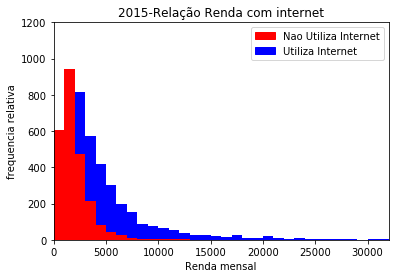

In [10]:
plot_Sim = plt.hist(rendaM_Sim, bins=ray,normed = False,color=('blue'),label ="Utiliza internet")
blue_patch = mpatches.Patch(color='blue', label='Utiliza Internet')
#plt.legend(handles=[blue_patch])
plt.ylabel('frequencia relativa')
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)
plt.title('2015-Relação Renda com internet')
plot_Nao = plt.hist(rendaM_Nao, bins=ray,normed = False,color=('red'),label ="NAO utiliza internet")
red_patch = mpatches.Patch(color='red', label='Nao Utiliza Internet')
plt.ylabel('frequencia relativa')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)



In [11]:
#DADOS de 2014 para o calculo da frequencias e criação de graficos:
#utilizadores
print("Frequencia relativa do Grafico de 2014 para utlizadores de internet:")
ray = np.arange(0,51700,1000)
varCat = pd.cut(rendaM_Sim_2014,ray)
print(varCat.value_counts())
#Nao utilizadores
print("Frequencia relativa do Grafico de 2014 para nao utlizadores de internet:")
ray_nao = np.arange(0,48000,1000)
varCat_nao = pd.cut(rendaM_Nao_2014,ray)
print(varCat_nao.value_counts())

Frequencia relativa do Grafico de 2014 para utlizadores de internet:
(2000, 3000]      815
(1000, 2000]      631
(3000, 4000]      608
(4000, 5000]      397
(5000, 6000]      253
(0, 1000]         185
(6000, 7000]      171
(7000, 8000]      137
(8000, 9000]       99
(9000, 10000]      76
(10000, 11000]     45
(11000, 12000]     42
(12000, 13000]     32
(13000, 14000]     31
(14000, 15000]     31
(19000, 20000]     14
(21000, 22000]     12
(16000, 17000]     12
(15000, 16000]     10
(17000, 18000]      9
(25000, 26000]      8
(18000, 19000]      7
(27000, 28000]      6
(24000, 25000]      5
(20000, 21000]      5
(29000, 30000]      4
(22000, 23000]      3
(26000, 27000]      2
(23000, 24000]      2
(33000, 34000]      2
(28000, 29000]      1
(44000, 45000]      1
(41000, 42000]      1
(39000, 40000]      1
(37000, 38000]      1
(35000, 36000]      1
(34000, 35000]      1
(32000, 33000]      1
(31000, 32000]      1
(49000, 50000]      1
(36000, 37000]      0
(38000, 39000]      0
(40000,

(0, 1200)

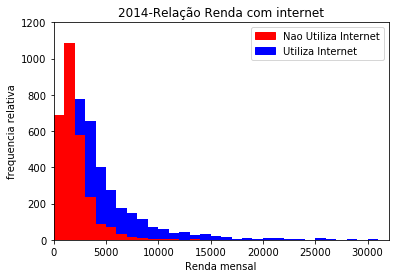

In [12]:
plot_Sim = plt.hist(rendaM_Sim_2014, bins=ray,normed = False,color=('blue'),label ="Utiliza internet")
blue_patch = mpatches.Patch(color='blue', label='Utiliza Internet')
#plt.legend(handles=[blue_patch])
plt.ylabel('frequencia relativa')
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)
plt.title('2014-Relação Renda com internet')
plot_Nao = plt.hist(rendaM_Nao_2013, bins=ray,normed = False,color=('red'),label ="NAO utiliza internet")
red_patch = mpatches.Patch(color='red', label='Nao Utiliza Internet')
plt.ylabel('frequencia relativa')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)


In [13]:
#DADOS de 2014 para o calculo da frequencias e criação de graficos:
#utilizadores
print("Frequencia relativa do Grafico de 2013 para utlizadores de internet:")
ray = np.arange(0,60000,1000)
varCat = pd.cut(rendaM_Sim_2013,ray)
print(varCat.value_counts())
#Nao utilizadores
print("Frequencia relativa do Grafico de 2013 para nao utlizadores de internet:")
ray_nao = np.arange(0,21000,1000)
varCat_nao = pd.cut(rendaM_Nao_2013,ray)
print(varCat_nao.value_counts())

Frequencia relativa do Grafico de 2013 para utlizadores de internet:
(2000, 3000]      705
(1000, 2000]      581
(3000, 4000]      510
(4000, 5000]      337
(5000, 6000]      225
(0, 1000]         173
(6000, 7000]      160
(7000, 8000]      112
(8000, 9000]       80
(9000, 10000]      67
(10000, 11000]     47
(13000, 14000]     32
(11000, 12000]     28
(12000, 13000]     21
(14000, 15000]     19
(15000, 16000]     16
(17000, 18000]     13
(16000, 17000]      9
(19000, 20000]      6
(21000, 22000]      6
(23000, 24000]      4
(22000, 23000]      4
(29000, 30000]      4
(33000, 34000]      3
(18000, 19000]      3
(24000, 25000]      3
(37000, 38000]      2
(20000, 21000]      2
(31000, 32000]      2
(30000, 31000]      2
(34000, 35000]      2
(25000, 26000]      2
(46000, 47000]      1
(43000, 44000]      1
(41000, 42000]      1
(40000, 41000]      1
(36000, 37000]      1
(26000, 27000]      1
(27000, 28000]      1
(28000, 29000]      1
(49000, 50000]      1
(48000, 49000]      0
(54000,

(0, 1200)

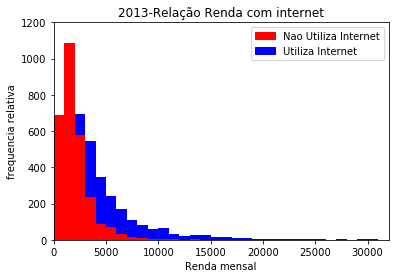

In [14]:
plot_Sim = plt.hist(rendaM_Sim_2013, bins=ray,normed = False,color=('blue'),label ="Utiliza internet")
blue_patch = mpatches.Patch(color='blue', label='Utiliza Internet')
#plt.legend(handles=[blue_patch])
plt.ylabel('frequencia relativa')
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)
plt.title('2013-Relação Renda com internet')
plot_Nao = plt.hist(rendaM_Nao_2013, bins=ray,normed = False,color=('red'),label ="NAO utiliza internet")
red_patch = mpatches.Patch(color='red', label='Nao Utiliza Internet')
plt.ylabel('frequencia relativa')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel('Renda mensal')
plt.xlim(0,32000)
plt.ylim(0,1200)


Pela analise dos graficos podemos notar que em todos os anos da analise, o uso de internet teve um forte impacto na renda da populaçao do Parana, pois quem nao possuim internet nao atingiu numeros maiores que 15000 reais,ficando limitado a um maximo de renda que é inferior a 15000.Grande parcela da populaçao se encontra na regiao de baixa renda pois o Brasil é um pais subdesenvolvido e portanto a populaçao de baixa renda possui maior numero de pessoas, assim aumentando a frequencia relativa dos dados.

Tambem é possivel comparar o aumento dos utilizadores de internet durante os ultimos tres anos pela simples razao do desenvolvimento da tecnologia que embarateou, e portanto ficoi mais acessivel a pessoas com uma renda menor, mas ainda assim teve um forte aumento no numero de pessoas que abtiveram sua renda aumetada.

###### Preguntas para a proxima APS:
 1.Qual a relaçao de utilizadores para a televisao?
 
 2.Ela(a realaço) sofre das mesmas consequencias que a internet para o aumento da renda?
 
 3.Qual a relaçao para a Renda per capta e a renda domiciliar per capta?
 
 4.Existe alguma relaçao entre o numero de televisores e a internet nos domicilios?
 
 5.(grafico conclusivo) Relaçao dos meios de comunicaçao(internet e televisao) com o total da renda da populaçao do Parana.


In [17]:
#data_resume['Rend.mens.Domiciliar'].max()
#data_resume['Rend.mens.Domiciliar'] = data_resume[data_resume['Rend.mens.Domiciliar']!=999999999999.0]
#data_resume['Rend.mens.Domiciliar']
#data_resume.to_csv('Novo_Data_resume.csv')

___
## Conclusão 

Descreva aqui suas conclusões!